In [ ]:
#Hello there. Inspired from Nicholas' code on Mario RL. Have included a few fixes on how we can run the RL training using PPO without an external display. (Please don't run env.state() as i still have to fix that..:)

In [2]:
pip install gym_super_mario_bros==7.3.0 nes_py

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 79.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.0 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446662 sha256=8e73bc240ddcb1b158f781665a94bc3838b27e804cdee2c567baf9aa66fb3fc5
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
  Attempting uninstall: shimmy
    Found existing installation: Shimmy 1.3.0
    Uninstalling Shimmy-1.3.0:
      Successfully uninstalled Shimmy-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

In [4]:
!pip3 install pyopengl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.4 MB/s eta 0:00:0000:0100:01


In [5]:
!apt-get install xvfb -y
!apt-get install python-opengl -y


Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.17).
0 upgraded, 0 newly installed, 0 to remove and 80 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libglu1-mesa libpython2-stdlib libpython2.7-minimal
  libpython2.7-stdlib python2 python2-minimal python2.7 python2.7-minimal
Suggested packages:
  python-tk python-numpy libgle3 python2-doc python2.7-doc binfmt-support
The following NEW packages will be installed:
  freeglut3 libglu1-mesa libpython2-stdlib libpython2.7-minimal
  libpython2.7-stdlib python-opengl python2 python2-minimal python2.7
  python2.7-minimal
0 upgraded, 10 newly installed, 0 to remove and 80 not upgraded.
Need to get 4540 kB of archives.
After this operation, 22.7 MB of additional disk space will be used.
Get:1 http://archive.ubunt

In [6]:
!pip install pyvirtualdisplay


In [7]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [8]:
pip install --upgrade nes-py


Note: you may need to restart the kernel to use updated packages.


In [20]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [21]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [22]:
import gym
env = gym.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
env=JoypadSpace(env,SIMPLE_MOVEMENT)

In [23]:
env.action_space

Discrete(7)

In [14]:
from gym.wrappers import FrameStack, GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [15]:
env = gym.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
env=JoypadSpace(env,SIMPLE_MOVEMENT)

/opt/conda/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/opt/conda/lib/python3.10/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [16]:
env=GrayScaleObservation(env,keep_dim=True)
env=DummyVecEnv([lambda:env])
env=VecFrameStack(env,4,channels_order='last')

/opt/conda/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [17]:
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

In [24]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()


In [25]:
state = env.reset()


In [26]:
state, reward, done, info = env.step([5])


TypeError: unhashable type: 'list'

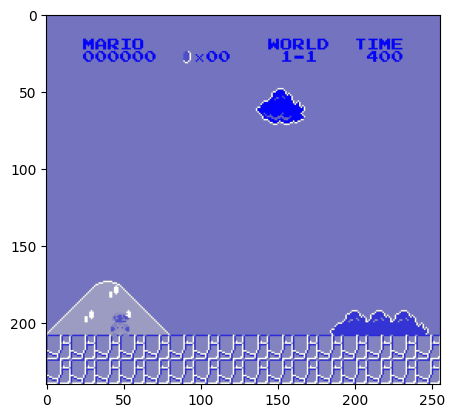

In [13]:
plt.imshow(state[0])

In [27]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [28]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self,check_freq,save_path,verbose=1):
        super(TrainAndLoggingCallback,self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path,exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path=os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        return True

In [29]:
CHECKPOINT_DIR='/kaggle/working//train/'
LOG_DI='/kaggle/working//logs/'

In [30]:
callback=TrainAndLoggingCallback(check_freq=100000,save_path=CHECKPOINT_DIR)

In [31]:
model=PPO('CnnPolicy',env,verbose=1,tensorboard_log=LOG_DI,learning_rate=0.000001,n_steps=512)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/opt/conda/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [34]:
model.learn(total_timesteps=100000,callback=callback)

Logging to /kaggle/working//logs/PPO_2
----------------------------
| time/              |     |
|    fps             | 105 |
|    iterations      | 1   |
|    time_elapsed    | 4   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 2            |
|    time_elapsed         | 12           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0002569172 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0229       |
|    learning_rate        | 1e-06        |
|    loss                 | 137          |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.000401    |
|    value_loss           | 454          |
---------------------------

In [35]:
model.save('thismodel')
print("Model Saved")

Model Saved


In [38]:
model = PPO.load('./train/best_model_100000')

In [43]:
import numpy as np
state = env.reset()

In [44]:
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

AttributeError: 'tuple' object has no attribute 'shape'